# 실습 및 과제 1

## 1.1 문장 벡터로 표현하기 & 코사인 유사도 적용하기

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import pandas as pd

# Cosine Simiarity
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


## 1.2 실제 텍스트 문장 벡터로 표현하기 - 단순 TF 이용

In [2]:
# 텍스트 데이터 (말뭉치)
# 아래 TEXT 변수의 각 원소가 하나의 문서를 의미합니다.
# CountVectorizer나 TfidfVectorizer 클래스를 이용하기 위해서는 
# 각 문서는 단어들로 구성된 하나의 문자열값으로 저장되어야 합니다.

TEXT = ['banana apple apple eggplant', 
        'orange carrot banana eggplant', 
        'apple carrot banana banana', 
        'orange banana grape'
]
# |         | apple |  banana  | carrot | eggplant | grape | orange |
# |---------|-------|----------|--------|----------|-------|--------|
# | 문서 1 |   2     |    1    |   0    |    1     |    0  |   0    |
# | 문서 2 |   0     |    1    |   1    |    1     |    0  |   1    |
# | 문서 3 |   1     |    2    |   1    |    0     |    0  |   0    |
# | 문서 4 |   0     |    1    |   0    |    0     |    1  |   1    |

In [3]:
# CountVectorizer 이용하기 # 단어의 순서 정보 버림, 단어 빈도수 추출
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
tf_vectorizer = CountVectorizer(min_df=2, max_df=0.8, ngram_range=(1,1)) # 최소 수, 문서 비율, 1,1은 단일 단어만 고려
tf_features = tf_vectorizer.fit_transform(TEXT) # DTM

In [4]:
# 단어들의 이름 확인하기
feature_names = tf_vectorizer.get_feature_names_out() # 이름 뽑기
print(feature_names)

['apple' 'carrot' 'eggplant' 'orange']


In [5]:
# 벡터화 된 문서 확인
features = np.array(tf_features.todense())
features

array([[2, 0, 1, 0],
       [0, 1, 1, 1],
       [1, 1, 0, 0],
       [0, 0, 0, 1]])

In [6]:
# 문서 벡터 집합 데이터프레임으로 표현하기
import pandas as pd
df = pd.DataFrame(data=features, columns=feature_names)
df

,apple,carrot,eggplant,orange
0,2,0,1,0
1,0,1,1,1
2,1,1,0,0
3,0,0,0,1


In [7]:
# Cosine 유사도 계산
print('문서 0과 문서1의 유사도 :',cos_sim(features[0], features[1]))
print('문서 1과 문서2의 유사도 :',cos_sim(features[1], features[2]))
print('문서 2와 문서3의 유사도 :',cos_sim(features[2], features[3]))

문서 0과 문서1의 유사도 : 0.2581988897471611
문서 1과 문서2의 유사도 : 0.40824829046386296
문서 2와 문서3의 유사도 : 0.0


## 1.3 실제 텍스트 문장 벡터로 표현하기 - TF-IDF 이용

In [8]:
TEXT

['banana apple apple eggplant',
 'orange carrot banana eggplant',
 'apple carrot banana banana',
 'orange banana grape']

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM
# 단어의 중요도를 가중치로 계산 /// TF : 단어의 출현 빈도, IDF : 얼마나 드물게 나옴?
tfidf_vectorizer = TfidfVectorizer(min_df=0.2, max_df=0.8, ngram_range=(1,1))
tfidf_features = tfidf_vectorizer.fit_transform(TEXT)

In [10]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(tfidf_feature_names)

['apple' 'carrot' 'eggplant' 'grape' 'orange']


In [11]:
tfidf_features = np.array(tfidf_features.todense())
tfidf_features

array([[0.89442719, 0.        , 0.4472136 , 0.        , 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.70710678, 0.70710678, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.78528828, 0.6191303 ]])

In [12]:
df = pd.DataFrame(data=tfidf_features, columns=tfidf_feature_names)
df

,apple,carrot,eggplant,grape,orange
0,0.894427,0.000000,0.447214,0.000000,0.00000
1,0.000000,0.577350,0.577350,0.000000,0.57735
2,0.707107,0.707107,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.785288,0.61913


In [13]:
# Cosine 유사도 계산
print('문서 0과 문서1의 유사도 :',cos_sim(tfidf_features[0], tfidf_features[1]))
print('문서 1과 문서2의 유사도 :',cos_sim(tfidf_features[1], tfidf_features[2]))
print('문서 2와 문서3의 유사도 :',cos_sim(tfidf_features[2], tfidf_features[3]))

문서 0과 문서1의 유사도 : 0.25819888974716115
문서 1과 문서2의 유사도 : 0.408248290463863
문서 2와 문서3의 유사도 : 0.0


## [1.4 실습 및 과제]

#### 해당 TEXT 파일을 다른 실제 예제 문장 10개를 가져와서 tf 벡터와 tfidf 벡터로 바꾼 후 코사인 유사도를 비교하여라

In [14]:
TEXT = [
        "We present a method for detecting objects in images using a single deep neural network",
        "Our approach, named SSD, discretizes the output space of bounding boxes into a set of default boxes over different aspect ratios and scales per feature map location",
        "At prediction time, the network generates scores for the presence of each object category in each default box and produces adjustments to the box to better match the object shape",
        "Additionally, the network combines predictions from multiple feature maps with different resolutions to naturally handle objects of various sizes",
        "SSD is simple relative to methods that require object proposals because it completely eliminates proposal generation and subsequent pixel or feature resampling stages and encapsulates all computation in a single network",
        "This makes SSD easy to train and straightforward to integrate into systems that require a detection component",
        "Experimental results on the PASCAL VOC, COCO, and ILSVRC datasets confirm that SSD has competitive accuracy to methods that utilize an additional object proposal step and is much faster, while providing a unified framework for both training and inference",
        "For 300×300 input, SSD achieves 74.3% mAP on VOC2007 test at 59 FPS on a Nvidia Titan X and for 512 × 512 input, SSD achieves 76.9% mAP, outperforming a comparable state of the art Faster R-CNN model",
        "Compared to other single-stage methods, SSD has much better accuracy even with a smaller input image size",
        "SSD is so nice"
]
## Your code here

from sklearn.feature_extraction.text import CountVectorizer 
tf_vectorizer = CountVectorizer(min_df=2, max_df=0.8, ngram_range=(1,1)) 
tf_features = tf_vectorizer.fit_transform(TEXT)
feature_names = tf_vectorizer.get_feature_names_out()
print(feature_names)

['accuracy' 'and' 'at' 'better' 'default' 'different' 'faster' 'feature'
 'for' 'has' 'in' 'input' 'into' 'is' 'map' 'methods' 'much' 'network'
 'object' 'objects' 'of' 'on' 'proposal' 'require' 'single' 'ssd' 'that'
 'the' 'to' 'with']


In [15]:
features = np.array(tf_features.todense())
features

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0,
        0, 0, 0, 0, 0, 4, 2, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 1],
       [0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 2, 0],
       [1, 3, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 2, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2,
        0, 0, 0, 2, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
df = pd.DataFrame(data=features, columns=feature_names)
df

,accuracy,and,at,better,default,different,faster,feature,for,has,...,of,on,proposal,require,single,ssd,that,the,to,with
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,1,0,1,0,0,...,2,0,0,0,0,1,0,1,0,0
2,0,1,1,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,4,2,0
3,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
4,0,2,0,0,0,0,0,1,0,0,...,0,0,1,1,1,1,1,0,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,2,0
6,1,3,0,0,0,0,1,0,1,1,...,0,1,1,0,0,1,2,1,1,0
7,0,1,1,0,0,0,1,0,2,0,...,1,2,0,0,0,2,0,1,0,0
8,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
print('문서 0과 문서1의 유사도 :',cos_sim(features[0], features[1]))
print('문서 1과 문서2의 유사도 :',cos_sim(features[1], features[2]))
print('문서 2와 문서3의 유사도 :',cos_sim(features[2], features[3]))
print('문서 3와 문서4의 유사도 :',cos_sim(features[3], features[4]))
print('문서 4와 문서5의 유사도 :',cos_sim(features[4], features[5]))
print('문서 5와 문서6의 유사도 :',cos_sim(features[5], features[6]))
print('문서 6와 문서7의 유사도 :',cos_sim(features[6], features[7]))
print('문서 7와 문서8의 유사도 :',cos_sim(features[7], features[8]))
print('문서 8와 문서9의 유사도 :',cos_sim(features[8], features[9]))

문서 0과 문서1의 유사도 : 0.0
문서 1과 문서2의 유사도 : 0.40824829046386296
문서 2와 문서3의 유사도 : 0.4999999999999999
문서 3와 문서4의 유사도 : 0.2651650429449553
문서 4와 문서5의 유사도 : 0.5833333333333334
문서 5와 문서6의 유사도 : 0.5229763603684908
문서 6와 문서7의 유사도 : 0.43145549730400484
문서 7와 문서8의 유사도 : 0.25298221281347033
문서 8와 문서9의 유사도 : 0.22360679774997896


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM
tfidf_vectorizer = TfidfVectorizer(min_df=0.2, max_df=0.8, ngram_range=(1,1))
tfidf_features = tfidf_vectorizer.fit_transform(TEXT)

In [19]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_features = np.array(tfidf_features.todense())
df = pd.DataFrame(data=tfidf_features, columns=tfidf_feature_names)

In [20]:
print('문서 0과 문서1의 유사도 :',cos_sim(tfidf_features[0], tfidf_features[1]))
print('문서 1과 문서2의 유사도 :',cos_sim(tfidf_features[1], tfidf_features[2]))
print('문서 2와 문서3의 유사도 :',cos_sim(tfidf_features[2], tfidf_features[3]))
print('문서 3와 문서4의 유사도 :',cos_sim(tfidf_features[3], tfidf_features[4]))
print('문서 4와 문서5의 유사도 :',cos_sim(tfidf_features[4], tfidf_features[5]))
print('문서 5와 문서6의 유사도 :',cos_sim(tfidf_features[5], tfidf_features[6]))
print('문서 6와 문서7의 유사도 :',cos_sim(tfidf_features[6], tfidf_features[7]))
print('문서 7와 문서8의 유사도 :',cos_sim(tfidf_features[7], tfidf_features[8]))
print('문서 8와 문서9의 유사도 :',cos_sim(tfidf_features[8], tfidf_features[9]))

문서 0과 문서1의 유사도 : 0.0
문서 1과 문서2의 유사도 : 0.36638672578896214
문서 2와 문서3의 유사도 : 0.38078768509170385
문서 3와 문서4의 유사도 : 0.22784339097940287
문서 4와 문서5의 유사도 : 0.509982610285867
문서 5와 문서6의 유사도 : 0.4172039806213022
문서 6와 문서7의 유사도 : 0.36490559400963896
문서 7와 문서8의 유사도 : 0.21090515301697255
문서 8와 문서9의 유사도 : 0.10938107676017392


## 2. 긴 문서 표현

In [21]:
from os import listdir
from os.path import isfile, join

# 아래 코드를 사용하여 폴더에 존재하는 파일의 이름만을 저장합니다.
mypath = '/kaggle/input/2024-1-nlp-1/docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [22]:
len(total_docs)

4

In [23]:
# 첫번째 문서
total_docs[1]

'Golden State Warriors star Kevin Durant was back home Wednesday in Prince George\'s County, Maryland, for the grand opening of an after-school facility that bears his name.\n\nCollege Track at The Durant Center, with a $10 million endowment from the nine-time All-Star, will provide scholarships, tutoring and emotional and financial support to neighborhood youngsters to aid them in getting into college all the way through graduation.\n\nThe Warriors, who play at the Washington Wizards on Thursday, excused Durant and teammate Quinn Cook -- a lifelong friend from Hyattsville, Maryland -- from practice so they could be there.\n\nThe shiny, new facility is just a few blocks from the apartment in the Suitland neighborhood where Durant grew up and the Seat Pleasant Activity Center, where he first dreamed of the life he has today playing basketball in the NBA.\n\nDurant introduced the inaugural class of 69 at the center on Wednesday.\n\n"The full-circle stuff that you dream about," Durant tol

## 2.1 문서 전처리

In [24]:
# import a python file for English text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def my_preprocessing(text, customized_stopwords=None):
# 1. 불필요한 symbols과 marks 제거하기
	filtered_content = re.sub(r'[^\s\d\w]','',text)

# 2. Case conversion; 대문자를 소문자로 바꾸기
	filtered_content = filtered_content.lower()

# 3. Word tokenization # 의미 단위로 쪼개기
	word_tokens = nltk.word_tokenize(filtered_content)

# 4. POS tagging
	tokens_pos = nltk.pos_tag(word_tokens)

# 5. Select Noun words
	NN_words = []
	for word, pos in tokens_pos:
		if 'NN' in pos:
			NN_words.append(word)

# 6. Lemmatization # ??동사?? -> 원형으로
# nltk에서 제공되는 WordNetLemmatizer을 이용하는 경우 
	wlem = WordNetLemmatizer()
	lemmatized_words = []
	for word in NN_words:
		#print(word, pos)
		#new_word = wlem.lemmatize(word)
		#print('lemma: ', new_word)
		lemmatized_words.append(word)

# 7. Stopwords removal # I, the, a, ... : 맥락에 필요 없는 단어
# 1차적으로 nltk에서 제공하는 불용어사전을 이용해서 불용어를 제거할 수 있습니다.

	stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
	#print('stopwords: ', stopwords_list)
	unique_NN_words = set(lemmatized_words)
	final_NN_words = lemmatized_words

	for word in unique_NN_words:
		if word in stopwords_list:
			while word in final_NN_words: final_NN_words.remove(word)
				

	return final_NN_words

In [25]:
# 각 문서의 전처리
# 전처리의 결과물은 불용어가 제거된 명사 단어들
docs_nouns = [my_preprocessing(doc, stopwords) for doc in total_docs]

In [26]:
documents_filtered = [' '.join(doc) for doc in docs_nouns]
print(len(documents_filtered))
documents_filtered[1]

4


'state warriors kevin durant home wednesday prince georges maryland opening afterschool facility name college track durant center endowment allstar scholarships support neighborhood youngsters college way graduation warriors washington wizards thursday durant teammate quinn friend maryland practice facility blocks apartment suitland neighborhood durant seat activity center life today basketball nba durant class center fullcircle stuff durant washington post people time name building durant foundation college track prince georges schools basketball courts seat activity center name facility legacy legacy success students part program name kevin durant lot years kids students jasmine richardson kids'

## [실습 및 과제 2]

#### 위 documents_filtered에 들어 있는 문서 4개를 1.3과 같이 tf-idf vectorizer를 통해서 벡터화하고 해당 결과를 1.3의 데이터프레임처럼 만들어라.

In [27]:
import numpy as np
import pandas as pd

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1,1))
tfidf_features = tfidf_vectorizer.fit_transform(documents_filtered)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_features = np.array(tfidf_features.todense())
df = pd.DataFrame(data=tfidf_features, columns=tfidf_feature_names)

In [29]:
tfidf_feature_names

array(['apple', 'back', 'battery', 'bottom', 'case', 'cases', 'center',
       'courts', 'day', 'degrees', 'design', 'everything', 'iphone',
       'life', 'lightning', 'lot', 'match', 'max', 'part', 'phone',
       'silicone', 'thursday', 'today', 'way', 'wednesday', 'xs', 'years'],
      dtype=object)

In [85]:
tfidf_features

array([[0.16918708, 0.04229677, 0.33837415, 0.08459354, 0.6767483 ,
        0.29607738, 0.04229677, 0.        , 0.04229677, 0.        ,
        0.04229677, 0.        , 0.25378061, 0.        , 0.04229677,
        0.03424288, 0.        , 0.12689031, 0.        , 0.42296769,
        0.04229677, 0.04229677, 0.        , 0.03424288, 0.        ,
        0.16918708, 0.03424288],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.81707062, 0.20426765, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.20426765, 0.        ,
        0.16537227, 0.        , 0.        , 0.20426765, 0.        ,
        0.        , 0.20426765, 0.20426765, 0.16537227, 0.20426765,
        0.        , 0.16537227],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2277606 , 0.        , 0.4555212 ,
        0.        , 0.2277606 , 0.        , 0.        , 0.        ,
        0.        , 0.6832818 , 0.        , 0.    

In [30]:
df

,apple,back,battery,bottom,case,cases,center,courts,day,degrees,...,max,part,phone,silicone,thursday,today,way,wednesday,xs,years
0,0.169187,0.042297,0.338374,0.084594,0.676748,0.296077,0.042297,0.000000,0.042297,0.000000,...,0.126890,0.000000,0.422968,0.042297,0.042297,0.000000,0.034243,0.000000,0.169187,0.034243
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817071,0.204268,0.000000,0.000000,...,0.000000,0.204268,0.000000,0.000000,0.204268,0.204268,0.165372,0.204268,0.000000,0.165372
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.227761,0.000000,0.455521,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368784,0.227761,0.000000,0.184392
3,0.056196,0.168588,0.505765,0.112392,0.280981,0.056196,0.000000,0.000000,0.112392,0.056196,...,0.112392,0.056196,0.168588,0.056196,0.000000,0.056196,0.000000,0.000000,0.280981,0.000000


## 3. Word2Vec을 이용한 문장 학습 및 단어 임베딩

In [31]:
with open('/kaggle/input/2024-1-nlp-1/2016_filtered_review.txt', encoding='utf-8') as f:
    docs = [line.strip().split('\t\t') for line in f]
print(len(docs))

for doc in docs[:10]:
    print("\nreview_id:", doc[0])
    print("review:", doc[1])
    print("rating:", doc[2])

788189

review_id: 140693
review:  아니 딴 그렇 비 비탄 총 대체 왜 들 온겨
rating: 7

review_id: 140693
review:  진심 쓰레기 영화 만들 무서 알 쫄아 틀었 이건 뭐 웃 거리 없는 쓰레기 영화 임
rating: 1

review_id: 140693
review:  역대 좀비 영화 가장 최고다 원작 만화 읽어 보려 영화 보고 결정 하려 감독 간츠 실사 했 사람 거르려 그냥 봤 정말 흠잡 없는 최고 좀비 영화 잔인 거 싫어하지 참고 볼 만하 로미 인물 왜 그런 모르
rating: 10

review_id: 140693
review:  온종일 불편한 피 범벅 일
rating: 6

review_id: 140693
review:  답답함 극치 움직일 잇으 좀 움직여 어지간히 좀비 봣으 얼 타고 때려 잡 때 되 않냐
rating: 1

review_id: 140693
review:  중간 중간 루즈 연출 아쉽 마지막 주자 창 대량학살 신 때문 이점 수준
rating: 7

review_id: 140693
review:  흔한 좀비 영화 흔하지 않은 흔한 우리네 모습 주인공 펼 본격 좀비 액션 사격 영화 당췌 여고생 존재 의미 모르
rating: 7

review_id: 140693
review:  좀비 캐릭터 역대 듯 일본 스러웠 높이뛰기 좀비 대박 이었 로미 캐릭터 제대로 살리 못 부분 아쉬웠
rating: 8

review_id: 140693
review:  초반 부산 행보 낫 후반 부산 행 더 낫다 둘 씹 노잼
rating: 5

review_id: 140693
review:  좀비 영화 라지 너무 무 내용 없자
rating: 3


In [32]:
docs[0]

['140693', ' 아니 딴 그렇 비 비탄 총 대체 왜 들 온겨', '7']

In [33]:
# 문서의 리뷰 부분만 뽑아서 전처리
reviews = [doc[1].strip().split() for doc in docs]

In [34]:
len(reviews)

788189

In [35]:
reviews[700000]

['기대', '봤', '왤케', '재미있는']

### gensim 모듈을 이용한 Word2Vec 학습

In [37]:
from gensim.models import Word2Vec
model_sg_n10 = Word2Vec(reviews, window=3, min_count=3, vector_size=100, sg=1, negative=10)
# 데이터, 문맥 창의 크기, 최소 등장 횟수, 벡터의 크기,  Skip-gram 알고리즘을 사용, negative samples의 수

In [38]:
model_sg_n10.wv['이정재']

array([ 0.1897736 ,  0.1546009 , -0.22080882, -0.43358397, -0.30824465,
        0.06253139, -0.00576475,  0.73046696,  0.71519893, -0.38053134,
        0.09352019, -0.45473275, -0.36848712,  0.03676392, -0.17498931,
        0.14767186, -0.1592434 ,  0.462772  , -0.06359582, -0.672551  ,
        0.02582163,  0.06175502,  0.09904741,  0.38630942, -0.3424089 ,
       -0.07932115,  0.40866375, -0.0324688 , -0.10923742, -0.04228137,
        0.16611773, -0.00848194, -0.30314207,  0.10362227, -0.31650114,
       -0.3409218 , -0.41760927, -0.21662709, -0.49959195, -0.03887739,
       -0.11569671,  0.3635517 , -0.21839833, -0.3040892 , -0.3289502 ,
        0.3416131 , -0.5449069 , -0.21628861, -0.7449503 , -0.17905112,
       -0.06913331, -0.2349937 , -0.32557416, -0.64594275,  0.41247222,
        0.34323323, -0.0268575 , -0.14804678, -0.28445145, -0.00431173,
       -0.49857947,  0.11034617,  0.44975135, -0.43651512, -0.4257354 ,
       -0.22595234, -0.22526023, -0.639706  ,  0.10710877, -0.02

In [39]:
model_sg_n10.wv.similarity('랄로', '승하')

0.88540983

In [40]:
similar_words = model_sg_n10.wv.most_similar('운동화',topn=10)
for i in range(10):
    print(similar_words[i][0])

반팔
필러
양철
송어
뻬룸
쌸라뿜빠
포은
모난돌
식장
감성돔


In [41]:
del similar_words

In [42]:
# model_sg_n10.wv['우주평화']
# # OOV

## [실습 및 과제 3]

#### 실습에서 학습한 word2vec을 모델을 기반으로 본인이 원하는 단어 5개를 선정하고, 이에 대해 most_similar를 통해 가장 가까운 단어 10개를 포함하여 시각화한 결과물을 보여라.
#### 총 50개의 단어에 대한 벡터를 시각화하면 된다.
#### Hint1: t-sne를 이용한 시각화 
#### Hint2: [예시]
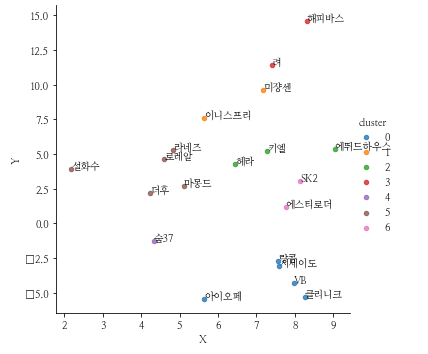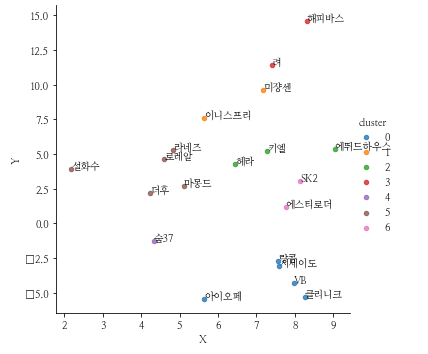

pca를 사용해 차원축소? 
벡터를 차원 축소해서 2차원 공간에 뿌리기

In [43]:
!apt-get -y update
!apt-get install -y fonts-nanum

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:4 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1225 B]   
Get:5 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Hit:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease               
Get:7 https://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [20.3 kB]
Get:8 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [623 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [29.7 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [3502 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [3593 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1194 kB]
Get:13 http://security.

In [44]:
with open('/kaggle/input/2024-1-nlp-1/2016_filtered_review.txt', encoding='utf-8') as f:
    docs = [line.strip().split('\t\t') for line in f]

reviews = [doc[1].strip().split() for doc in docs]

from gensim.models import Word2Vec
model_sg_n10 = Word2Vec(reviews, window=3, min_count=3, vector_size=100, sg=1, negative=10)

In [45]:
## your code here
import numpy as np
words = ['김대중','노무현', '이명박', '박근혜', '문재인']
similar_words_list = []
similar_words_vector = []

for word in words:
    for i in range(10):
        similar_words_list.append(model_sg_n10.wv.most_similar(word,topn=10)[i][0])
    
for i in range(50):
    similar_words_vector.append(model_sg_n10.wv[similar_words_list[i]])
    
similar_words_vector = np.array(similar_words_vector)

In [46]:
import numpy as np
from sklearn.manifold import TSNE

gamst = []
tsne = TSNE(n_components=2, random_state=42)

# for i in range(50):

gamst1 = tsne.fit_transform(similar_words_vector)
gamst.append(gamst1)

gamst = np.array(gamst)

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x_data = gamst[0][:, 0]
y_data = gamst[0][:, 1]

group_indices = np.arange(len(x_data)) // 10

colors = ['red', 'blue', 'green', 'yellow', 'purple']

# 각 10개의 데이터를 하나의 그룹으로 만들기 위해 인덱스를 10개씩 나눔
# 색상 팔레트를 생성하여 각 그룹에 대한 색상 할당

In [50]:
import matplotlib.font_manager as fm
import matplotlib.cm as cm

In [51]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  
fontprop = fm.FontProperties(fname=font_path, size=12)

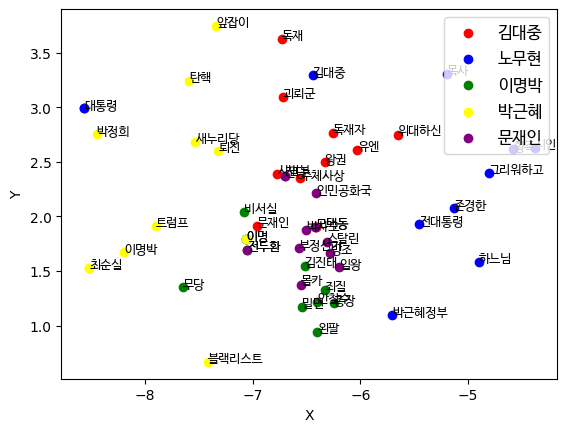

In [54]:
group_labels = []
for group in np.unique(group_indices):
    group_x = x_data[group_indices == group]
    group_y = y_data[group_indices == group]
    plt.scatter(group_x, group_y, color=colors[group])
    if len(group_x) > 0:
        group_labels.append(plt.scatter(group_x[0], group_y[0], color=colors[group], label=words[group]))

for x, y, name in zip(x_data, y_data, similar_words_list):
    plt.text(x, y, name, fontproperties=fontprop, fontsize=9)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(handles=group_labels, loc='upper right', prop=fontprop)
plt.show()

## 4. Word2Vec을 이용한 문장 학습 및 문장/문서 임베딩

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
pip install kiwipiepy # 캐글에 라이브러리 없음

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 36.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 54.4 MB/s eta 0:00:00:00:01
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.17.0-py3-none-any.whl size=34845035 sha256=f39678bfca34b1f8130a9b45cb5144266b97e7fa8dcedacec0a8720e0221112a
  Stored in directory: /root/.cache/pip/wheels/90/bb/ae/15e1cf26d17183040bac268fbf8d1ca1f45f7f4daa0fb76b91
Successfully built kiwipiepy-model
Note: you may need to restart the kernel to use updated packages.


In [57]:
## 텍스트 전처리 다른 방법
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
def preprocess(content):
    if len(content.strip()) > 3: # 길이 3
        filtered_content = re.sub(r'[^\s\w\d]',' ', content) # 특수문자
        kiwi_tokens = kiwi.tokenize(filtered_content) # 토큰화
        results = [token.form for token in kiwi_tokens]
        return results

In [79]:
# 데이터 불러오기
with open('/kaggle/input/2024-1-nlp-1/2016_filtered_review.txt', encoding='utf-8') as f:
    docs = [line.strip().split('\t\t') for line in f]

In [59]:
reviews = [doc[1].strip() for doc in docs][:10000]

In [60]:
# 전처리 수행
preprocessed_reviews = [preprocess(review) for review in reviews]

### gensim 모듈을 이용한 doc2vec 학습

In [61]:
from gensim.models.doc2vec import TaggedDocument
tagged_docs = [TaggedDocument(doc, tags=[i]) for i, doc in enumerate(preprocessed_reviews) if doc != None]

In [62]:
# words: document / tags: id
# 전처리
tagged_docs[1]

TaggedDocument(words=['진심', '쓰레기', '영화', '만드', 'ᆯ', '무서', '알', '쫄', '어', '틀', '어', 'ᆻ', '이거', 'ᆫ', '뭐', '웃', '거리', '없', '는', '쓰레기', '영화', '이', 'ᆷ'], tags=[1])

In [63]:
from gensim.models.doc2vec import Doc2Vec # 문서를 벡터로 표현
model = Doc2Vec(tagged_docs, vector_size=100, min_count=3, epochs=100, dm=1, negative=5, alpha=0.001)

In [64]:
print(model.dv.most_similar(100, topn=10)) # 리뷰 아이디, 점수

[(9004, 0.6046459674835205), (129, 0.5934380292892456), (539, 0.5922144055366516), (1066, 0.5876038074493408), (9483, 0.5838772058486938), (5314, 0.583275318145752), (8231, 0.5828157067298889), (909, 0.580727219581604), (4007, 0.5799279808998108), (6282, 0.5796282887458801)]


In [65]:
len(reviews)

10000

In [66]:
# 학습 데이터 : 10000개, 파라미터 그대로
results = model.dv.most_similar(100, topn=10)

print("\nOriginal Review:")
print(reviews[100])
for i, result in enumerate(results):
    print("\nSimilar Reviews", i+1)
    print(result)
    review_id = result[0]
    print(reviews[review_id])


Original Review:
중반 루즈 하게 늘어지 했 좀더 높은 평점 될 있었 조금 아쉬운 전개

Similar Reviews 1
(9004, 0.6046459674835205)
용기 제작 감사합

Similar Reviews 2
(129, 0.5934380292892456)
소신 껏 준 졸지 않았 것 생각하면 더 줘 졸았 정말 기대 했

Similar Reviews 3
(539, 0.5922144055366516)
와 진짜 걸 재밌다 사람 있구 원작 있는 같은 원작 안보 영화 본 사람 태국 좀비 영화 이었 레알 마지막 주인공 시계 풀 총 쏘고 상황 정리할 때 게뭐 이영화 본 졸라 자괴 감 들었 수고하세 입 소문 믿 진짜 못 됨

Similar Reviews 4
(1066, 0.5876038074493408)
절대 보지 마라 무슨 류 만화 같다

Similar Reviews 5
(9483, 0.5838772058486938)
영화 무현 보고 그동안 할 많아 꽤 적고 지우고 도 적고 지우고 나 감독 당신 싫 감히 노무현 대통령 당신 가족 일기장 영화로 만든 이해 하려 하다 싫고

Similar Reviews 6
(5314, 0.583275318145752)
울었 웃었 정말 따뜻했 영화 였 사실 엑소 디오 팬심 갔 다시 한번 친구 우정 다지 보기 좋 영화인 것 같아 범실 수옥 꺼내 때 진짜 얼마나 울었

Similar Reviews 7
(8231, 0.5828157067298889)
넘 별로 였 흐름 뚝뚝 끊어지는 느낌 있고 공감 하기 어렵 아름답 않아 보기 힘들었

Similar Reviews 8
(909, 0.580727219581604)
자고로 좀비 영환 금 딱지 붙이 봐 부산 행보 배 잼 봤

Similar Reviews 9
(4007, 0.5799279808998108)
옛 생각 이나 향수 같은 영화

Similar Reviews 10
(6282, 0.5796282887458801)
재밌어 아들 좋아해


## [실습 및 과제 4]

#### 실습 4의 코드를 수정하여 조금 더 많은 양의 문서를 학습하여 더 정확한 비슷한 리뷰 랭킹 결과가 나오게 한다.
#### Hint1: 학습하는 리뷰의 수를 늘리기 (현재는 10,000개의 리뷰만 학습된 상태이고, 총 788,189개 리뷰가 존재한다.)
#### Hint2: doc2vec의 파라미터 변경
#### 1. 개선된 모델에 대한 분석하는 리포트를 작성하라. (어떤 부분을 개선 했는지)
#### 2. 개선의 결과 중 어떤 부분이 비슷한지 자연어처리 관점에서 설명하라.

# 학습 데이터 : 30000개, 파라미터 유지

In [67]:
# your code here

# 학습량 늘리기
reviews = [doc[1].strip() for doc in docs][:30000]
preprocessed_reviews = [preprocess(review) for review in reviews]
tagged_docs = [TaggedDocument(doc, tags=[i]) for i, doc in enumerate(preprocessed_reviews) if doc != None]

# 파라미터 유지
model = Doc2Vec(tagged_docs, vector_size=100, min_count=3, epochs=100, dm=1, negative=5, alpha=0.001)

In [68]:
results = model.dv.most_similar(100, topn=10)
print("\nOriginal Review:")
print(reviews[100])

# 비교
for i, result in enumerate(results):
    print("\nSimilar Reviews", i+1)
    print(result)
    review_id = result[0]
    print(reviews[review_id])


Original Review:
중반 루즈 하게 늘어지 했 좀더 높은 평점 될 있었 조금 아쉬운 전개

Similar Reviews 1
(13826, 0.7319580912590027)
음 생각 별로 였 수호 혼자 인 현실 감 없게 생겼 아이 청춘 어른 의해 밟 되 은 그 결속 균열 내버리는 현실 잘 축약 했 생각 연출 개연 성은 좀 아쉽 느껴졌 점 적당한

Similar Reviews 2
(24423, 0.718135416507721)
볼 했 실제 극악 무도 했 것 같은 그런 극적 요소 좀 더 사실 묘사 되었 좋 것 같

Similar Reviews 3
(25871, 0.7118659019470215)
소재 좋 배우 연기 좋 조금 일차 원적 보여 준 덕혜옹주 치면 나오는 정보 흐름 같아 실망 늙은 모습 조금 웃프기 소재 생각하게 뭔가 확실히 있는

Similar Reviews 4
(3847, 0.7008901834487915)
너무 순정 스럽 하기 좀 그렇 너무 밋밋 감 평점 높은 이해 조금 안되 전문가 관객 평점 너무 차이 가나 점 드려 조금 평점 잘못된 같다 기분

Similar Reviews 5
(740, 0.699446439743042)
아쉬운 점 있다 원작 만화 다른 스 피디 전개 원작 느긋 심리 묘사 잔잔 시간 전개 영화 특수성 급 박하 다급하게 전개된 원작 모르 보는 관객 입장 인물 몰입 조금 버거

Similar Reviews 6
(15717, 0.6890798807144165)
좋 배우 아까운 영화 스토리 너무 허 접하고 지루하고 코미디 데 코믹 요소 하나 없 시간 돈 아까웠 어디 봐 장르 코미디

Similar Reviews 7
(288, 0.6885049939155579)
도시 전체 패닉 휩싸 잘 표현한 같 나름 긴장감 있고 아쉬운 점 원작 스토리 너무 길기 때문 삭제 된 부분 너무 많 때문 결말 애매 하게 끝낼 수 없었 같네 전체 스토리 구체 아실 원작 보세

Similar Reviews 8
(4144, 0.6733856797218323

# 학습 데이터 : 30000개, 파라미터 수정

In [80]:
# 학습량 늘리기
reviews = [doc[1].strip() for doc in docs][:30000]
preprocessed_reviews = [preprocess(review) for review in reviews]
tagged_docs = [TaggedDocument(doc, tags=[i]) for i, doc in enumerate(preprocessed_reviews) if doc != None]

In [84]:
model = Doc2Vec(tagged_docs, vector_size=100, min_count=3, epochs=50, dm=1, negative=20, alpha=0.001)
results = model.dv.most_similar(100, topn=10)
print("\nOriginal Review:")
print(reviews[100])

# 비교
for i, result in enumerate(results):
    print("\nSimilar Reviews", i+1)
    print(result)
    review_id = result[0]
    print(reviews[review_id])


Original Review:
중반 루즈 하게 늘어지 했 좀더 높은 평점 될 있었 조금 아쉬운 전개

Similar Reviews 1
(129, 0.8532208204269409)
소신 껏 준 졸지 않았 것 생각하면 더 줘 졸았 정말 기대 했

Similar Reviews 2
(413, 0.8490427732467651)
크게 감탄 건 초반 아비규환 된 도시 좀비 쫒길 때 앵글 시점 마치 영화 속 인물 된 것 처럼 빠져 들 만들어 놀랐 무엇 좀비 매니아 로서 기존 좀비 영화 다르 주인공 찌 하게 설정 것 좀비 과거 산다 설정 참신 했

Similar Reviews 3
(65, 0.8485008478164673)
최고 영화 중독 개 쩔 가비 위 높은 건지 좀비 별로 안 무서웠 다만 제일 첫 주인공 여친 조금 소름 였 편도 꼭 나와 줬 하는 영화

Similar Reviews 4
(25590, 0.8483538627624512)
애국심 마케팅 역사왜곡 결코 간과 할 없는 포인트 겠지 그로 더 주목 받아 마땅한 것 외면 당하지 않았 합 잘만 드라마 임 틀임 없

Similar Reviews 5
(1559, 0.8478608727455139)
점 에바

Similar Reviews 6
(1186, 0.8464481234550476)
이 시바 영화관 광고 할 때 재밌어 보 보러 갔 새벽 저주 일 주후 부산 행 워킹데드 나 전설 등 좀비 영화 좋아함 스토리 게 무슨 똥 싸다 끊어 거 같은 쓰레기 같은 스토리 미술 연기 연출 같은 좋 점줌

Similar Reviews 7
(740, 0.8441906571388245)
아쉬운 점 있다 원작 만화 다른 스 피디 전개 원작 느긋 심리 묘사 잔잔 시간 전개 영화 특수성 급 박하 다급하게 전개된 원작 모르 보는 관객 입장 인물 몰입 조금 버거

Similar Reviews 8
(20238, 0.8437995910644531)
거 원작 인터뷰 더 가관 와 아니 이건 아니 아예 독립운동 거리 있어 한참 있는 인물 독립운동가 그려 무